# [실습1] Sequence 숫자 데이터 예측하기

### 데이터 준비

In [2]:
    import numpy as np

    # 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
    # seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
    def sequence_gen(size, seq_len):
        # 비어있는 넘파이 배열을 생성한다.
        seq_X = np.empty(shape=(size, seq_len, 1))
        Y = np.empty(shape=(size,))

        for i in range(size):
            # [0, 0.1, 0.2, .. ]같은 시퀀스와 Y 값을 size 갯수만큼 생성
            c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
            seq_X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
            Y[i] = (i+seq_len) / 10       # 목표값을 생성함

        return seq_X, Y

In [3]:
n, seq_len = 8, 16
X_train, y_train = sequence_gen(8, 16)
X_train.shape, y_train.shape

((8, 16, 1), (8,))

In [4]:
X_train

array([[[0. ],
        [0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ],
        [1.1],
        [1.2],
        [1.3],
        [1.4],
        [1.5]],

       [[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ],
        [1.1],
        [1.2],
        [1.3],
        [1.4],
        [1.5],
        [1.6]],

       [[0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ],
        [1.1],
        [1.2],
        [1.3],
        [1.4],
        [1.5],
        [1.6],
        [1.7]],

       [[0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ],
        [1.1],
        [1.2],
        [1.3],
        [1.4],
        [1.5],
        [1.6],
        [1.7],
        [1.8]],

       [[0.4],
        [0.5],
  

In [4]:
print('훈련용 데이터')
for i in range(n):
    print(X_train[i].flatten(), y_train[i])

half_n, offset = int(n/2), 1.0
X_test = X_train[:half_n] + offset
y_test = y_train[:half_n] + offset

print('검증용 데이터')
for i in range(half_n):
    print(X_test[i].flatten(), y_test[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


### simple RNN 모델 구현

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(units=256, return_sequences=False, input_shape=(16, 1)),
    Dense(1)
])
model.compile(loss='mse', metrics='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [10]:
# 학습
hist = model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 4.5663 - mae: 2.1218 - 725ms/epoch - 725ms/step
Epoch 2/100
1/1 - 0s - loss: 0.0155 - mae: 0.0938 - 7ms/epoch - 7ms/step
Epoch 3/100
1/1 - 0s - loss: 0.8496 - mae: 0.9166 - 5ms/epoch - 5ms/step
Epoch 4/100
1/1 - 0s - loss: 0.4110 - mae: 0.6337 - 5ms/epoch - 5ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0122 - mae: 0.0943 - 6ms/epoch - 6ms/step
Epoch 6/100
1/1 - 0s - loss: 0.3099 - mae: 0.5435 - 6ms/epoch - 6ms/step
Epoch 7/100
1/1 - 0s - loss: 0.3610 - mae: 0.5911 - 7ms/epoch - 7ms/step
Epoch 8/100
1/1 - 0s - loss: 0.1638 - mae: 0.3958 - 6ms/epoch - 6ms/step
Epoch 9/100
1/1 - 0s - loss: 0.0220 - mae: 0.1329 - 5ms/epoch - 5ms/step
Epoch 10/100
1/1 - 0s - loss: 0.0140 - mae: 0.1064 - 8ms/epoch - 8ms/step
Epoch 11/100
1/1 - 0s - loss: 0.0707 - mae: 0.2608 - 6ms/epoch - 6ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0976 - mae: 0.3081 - 6ms/epoch - 6ms/step
Epoch 13/100
1/1 - 0s - loss: 0.0652 - mae: 0.2497 - 7ms/epoch - 7ms/step
Epoch 14/100
1/1 - 0s - loss: 0.0166 - mae:

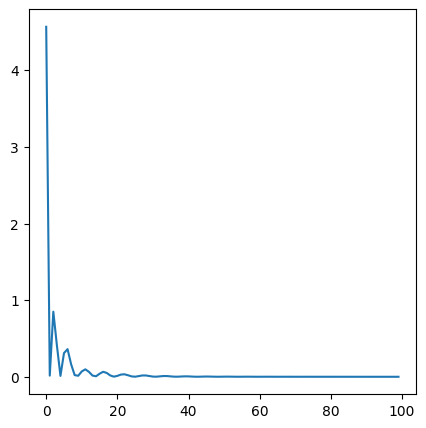

In [13]:
import pandas as pd
df = pd.DataFrame(hist.history)

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(df.loss, label='train_loss')

In [14]:
model.predict(X_test)

1/1 [==============================] - 0s 151ms/step


array([[2.4421456],
       [2.4911082],
       [2.53563  ],
       [2.5761456]], dtype=float32)

# [실습2] sin함수 형태의 시계열 데이터 예측하기
- sin 곡선의 일부를 잘라 만든 시퀀스를 보고 다음 값을 예측하는 RNN 모델을 구현한다.


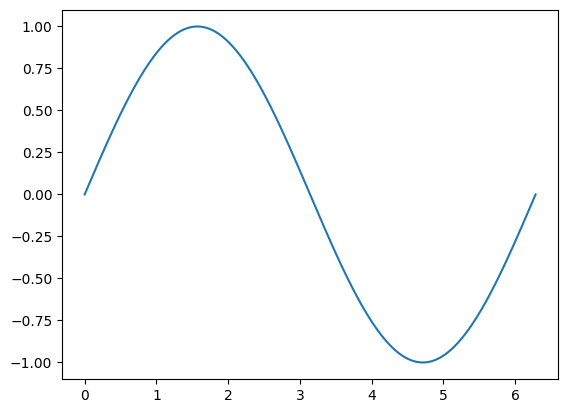

In [15]:
# 사인 함수 그리기
import numpy as np 
start = 0 
end = 2 * np.pi 
dx = 1000 
x = np.linspace(start, end, dx)

import numpy as np 
from matplotlib import pyplot as plt 
start = 0 
end = 2 * np.pi 
dx = 1000 
x = np.linspace(start, end, dx) 

plt.plot(x, np.sin(x))

### 데이터 준비

In [ ]:
# 데이터는 각 차원이 자료수, 타임 스텝의 크기, 특성 형태의 3차원 텐서

In [ ]:
# 사인 함수 그리기
import numpy as np 
start = 0 
end = 2 * np.pi 
dx = 1000 
x = np.linspace(start, end, dx)

import numpy as np 
from matplotlib import pyplot as plt 
start = 0 
end = 2 * np.pi 
dx = 1000 
x = np.linspace(start, end, dx) 

plt.plot(x, np.sin(x))


In [16]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10
# 비어있는 넘파이 배열을 생성한다.
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))
s = np.sin(2 * np.pi )
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [18]:
# 생성하는 시퀀스는 구간의 길이는 같고, 시작하는 값은 모두 다르게 만듦.(난수발생)
# 구간의 마지막 값으로 Y label을 만듦
shift = np.random.randn(size) # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])
seq_X.shape, Y.shape

((100, 10, 1), (100,))

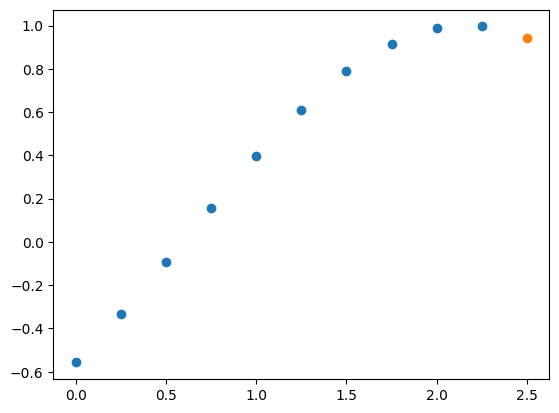

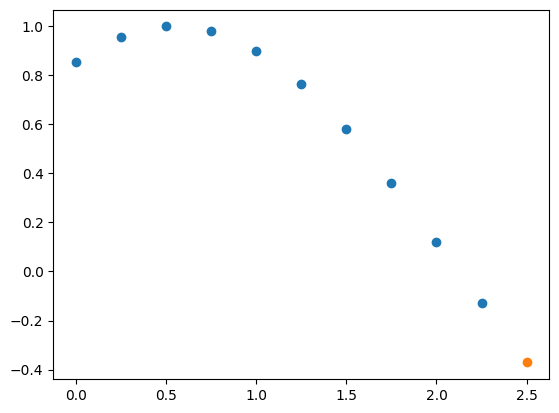

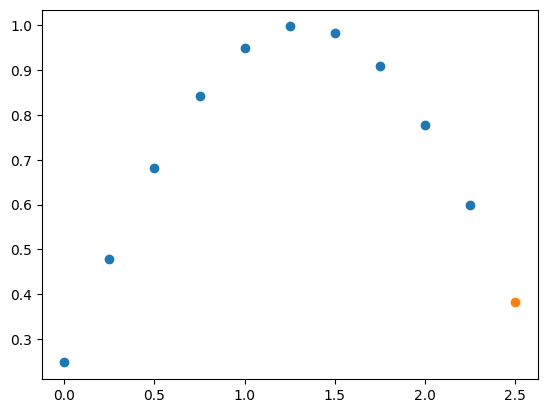

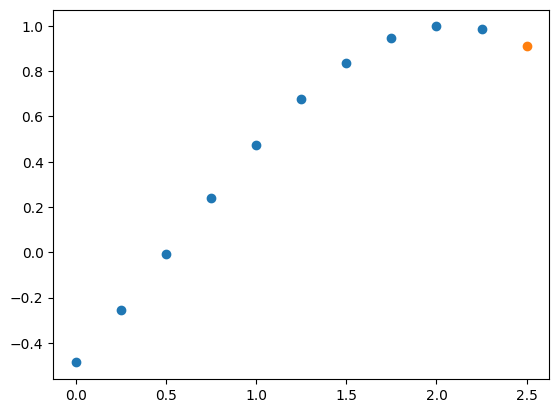

In [19]:
# 100개의 시퀀스 중 4개를 시각화해봄
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [ ]:
# 80개는 훈련, 20개는 검증

In [20]:
X_train = seq_X[:80]
y_train = Y[:80]
X_test = seq_X[80:]
y_test = Y[80:]

### simple RNN 모델 구현

In [22]:
model = Sequential([
    SimpleRNN(units=10, return_sequences=False, input_shape=(10, 1)),
    Dense(1)
])
model.summary()
model.compile(loss='mse', metrics='mae', optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(X_train, y_train, epochs=50, verbose=2)

Epoch 1/50
3/3 - 1s - loss: 1.0641 - mae: 0.9206 - 576ms/epoch - 192ms/step
Epoch 2/50
3/3 - 0s - loss: 0.9577 - mae: 0.8740 - 6ms/epoch - 2ms/step
Epoch 3/50
3/3 - 0s - loss: 0.8632 - mae: 0.8293 - 6ms/epoch - 2ms/step
Epoch 4/50
3/3 - 0s - loss: 0.7693 - mae: 0.7831 - 44ms/epoch - 15ms/step
Epoch 5/50
3/3 - 0s - loss: 0.6869 - mae: 0.7368 - 8ms/epoch - 3ms/step
Epoch 6/50
3/3 - 0s - loss: 0.6055 - mae: 0.6919 - 11ms/epoch - 4ms/step
Epoch 7/50
3/3 - 0s - loss: 0.5321 - mae: 0.6483 - 13ms/epoch - 4ms/step
Epoch 8/50
3/3 - 0s - loss: 0.4656 - mae: 0.6061 - 9ms/epoch - 3ms/step
Epoch 9/50
3/3 - 0s - loss: 0.4033 - mae: 0.5631 - 7ms/epoch - 2ms/step
Epoch 10/50
3/3 - 0s - loss: 0.3501 - mae: 0.5238 - 9ms/epoch - 3ms/step
Epoch 11/50
3/3 - 0s - loss: 0.2964 - mae: 0.4829 - 7ms/epoch - 2ms/step
Epoch 12/50
3/3 - 0s - loss: 0.2553 - mae: 0.4489 - 6ms/epoch - 2ms/step
Epoch 13/50
3/3 - 0s - loss: 0.2139 - mae: 0.4106 - 10ms/epoch - 3ms/step
Epoch 14/50
3/3 - 0s - loss: 0.1807 - mae: 0.3759 -

In [25]:
df = pd.DataFrame(hist.history)
df

,loss,mae
0,1.064143,0.920626
1,0.957690,0.873970
2,0.863213,0.829279
3,0.769269,0.783144
4,0.686875,0.736813
5,0.605523,0.691910
6,0.532062,0.648264
7,0.465569,0.606121
8,0.403257,0.563130
9,0.350094,0.523792
